# Plan de trabajo: Análisis exploratorio de datos 

El plan de elaboración del proyecto se distruibuirá de la siguiente forma:

- Se analizará la información asignada por la persona a cargo del proyecto, buscando datos clave para generar preguntas aclaratorias que nos permitan comenzar acciones de manera eficaz y clara. Por otra parte, se realizará un Exploratory Data Analysis (EDA) para entender la distribucion de los datos en los diferentes archivos disponibles para la exploración, asi como para descubrir insights importantes para el cliente. A esta etapa la llamaremos Importación y revisión de datos.
- Después se harán visualizaciones de los insights clave para entender el objetivo: el church de clientes. Lo que conoceremos como visualización de datos.
- Enseguida se comenzará con la preparación de datos para el modelado. Esta será la parte 3. Preparación del modelado.
- A continuación se pondrá a prueba el modelado predictivo (clasificación binaria) para aplicación y evaluación de modelos. A la que asignaremos como la fase de Modelado predictivo.
- Finalmente se identificarán las conclusiones y recomendaciones del proyecto. 

Esta será la estructura básica del plan, a continuación se detallará cada sección de nuestro plan de trabajo. 

## Objetivo general

Analizar los datos disponibles de los clientes de la compañía de telecomunicaciones para identificar posibles aptrones o catacterísticas relacionadas con la **fuga (churn) de clientes**.

## Plan de acción : Importación y revisión de datos.

1. Para comenzar con nuestro analisis de datos es necesario importar los archivos necesarios y manejarlos o limpiarlos de la manera mas eficiente para nuestras necesidades, en esta ocasión enlazaremos todos los archivos mediante el método merge() para que sea mas fácil trabajar con los datos, se aprovechará la columna del ID del cliente para que nuestros archivos sean capaces de estar en conjunto. 
2. Una vez listo nuestro df total, se hará una lectura general de nuestro df, mediante metodos como info(), describe(), unique().
3. Se aplicará limpieza de datos, en las que se tomarán en cuenta los valores nulos, duplicados y su tipo de datos. 
4. La fecha de contrato que menciona el resumen no son los unicos datos que nos servirán, sin embargo, manejaremos las fechas para ver insights entre los tipos de planes de la empresa. 
5. Analizar la distribución de variables clave como tipo de contrato, servicios activos, forma de pago, total facturado.
6. Examinar correlaciones entre variables y la columna de “churn” (si está disponible).


## Preguntas aclaratorias 

1. ¿Qué variable específica del dataset indica si un cliente ha abandonado el servicio?
2. ¿Podemos asumir que los datos de fechas anteriores a 2020 también son válidos, aunque el resumen mencione febrero de 2020?
3. ¿Debemos enfocar el análisis solo en clientes activos, inactivos o ambos?
4. ¿Qué metricas o resultados espera el equipo como entregables principales (por ejemplo, visualizaciones, KPIs, recomendaciones)?
5. ¿Se permite agregar fuentes externas o usar librerías específicas para enriquecer el análisis?

### 1. Carga y revisión de datos 
- Unificar los distintos archivos CSV ().

- Validar tipos de datos, valores nulos y duplicados para asegurar consistencia. 

In [87]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

In [88]:
df_contract = pd.read_csv(r"/workspaces/my_last_dance/My_last_dance/final_provider/contract.csv")
print(f"La información general de contract es: {df_contract.info()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB
La información general de contract es: None


In [89]:
df_internet = pd.read_csv(r"/workspaces/my_last_dance/My_last_dance/final_provider/internet.csv")
print(f"La información general de internet es: {df_internet.info()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB
La información general de internet es: None


In [90]:
df_personal = pd.read_csv(r"/workspaces/my_last_dance/My_last_dance/final_provider/personal.csv")
print(f"La información general de personal es: {df_personal.info()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB
La información general de personal es: None


In [91]:
df_phone = pd.read_csv(r"/workspaces/my_last_dance/My_last_dance/final_provider/phone.csv")
print(f"La información general de phone es: {df_phone.info()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB
La información general de phone es: None


### 2. Limpieza y transformación
- Convertir columnas relevantes como fechas y montos (`BeginDate`, `EndDate`, `TotalCharges`) a tipos adecuados (`datetime`, `float`).
- Rellenar o eliminar valores faltantes según contexto (por ejemplo, imputar con la media o moda, o eliminar si son pocos).
- Estandarizar columnas categóricas y manejar casos como “No” o valores atípicos.

In [92]:
dfs = {
    "Contrato": df_contract,
    "Internet": df_internet,
    "Personal": df_personal,
    "Teléfono": df_phone
}

In [93]:
for nombre, df in dfs.items():
    print(f"\n📄 Información de las primeras 5 líneas del DataFrame '{nombre}':\n")
    print(df.head())

    for nombre, df in dfs.items():
        print(f"Los valores nulos de '{nombre}' son: {df["customerID"].isnull().sum()}\nLos valores duplicados de '{nombre}' son: {df['customerID'].duplicated().sum()}")


📄 Información de las primeras 5 líneas del DataFrame 'Contrato':

   customerID   BeginDate              EndDate            Type  \
0  7590-VHVEG  2020-01-01                   No  Month-to-month   
1  5575-GNVDE  2017-04-01                   No        One year   
2  3668-QPYBK  2019-10-01  2019-12-01 00:00:00  Month-to-month   
3  7795-CFOCW  2016-05-01                   No        One year   
4  9237-HQITU  2019-09-01  2019-11-01 00:00:00  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges TotalCharges  
0              Yes           Electronic check           29.85        29.85  
1               No               Mailed check           56.95       1889.5  
2              Yes               Mailed check           53.85       108.15  
3               No  Bank transfer (automatic)           42.30      1840.75  
4              Yes           Electronic check           70.70       151.65  
Los valores nulos de 'Contrato' son: 0
Los valores duplicados de 'Contrato

In [94]:
df = df_contract.merge(df_internet, on="customerID", how= "inner")
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5517 non-null   object 
 1   BeginDate         5517 non-null   object 
 2   EndDate           5517 non-null   object 
 3   Type              5517 non-null   object 
 4   PaperlessBilling  5517 non-null   object 
 5   PaymentMethod     5517 non-null   object 
 6   MonthlyCharges    5517 non-null   float64
 7   TotalCharges      5517 non-null   object 
 8   InternetService   5517 non-null   object 
 9   OnlineSecurity    5517 non-null   object 
 10  OnlineBackup      5517 non-null   object 
 11  DeviceProtection  5517 non-null   object 
 12  TechSupport       5517 non-null   object 
 13  StreamingTV       5517 non-null   object 
 14  StreamingMovies   5517 non-null   object 
dtypes: float64(1), object(14)
memory usage: 646.7+ KB
None


In [95]:
df= df.merge(df_personal, on= "customerID", how="inner")
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5517 non-null   object 
 1   BeginDate         5517 non-null   object 
 2   EndDate           5517 non-null   object 
 3   Type              5517 non-null   object 
 4   PaperlessBilling  5517 non-null   object 
 5   PaymentMethod     5517 non-null   object 
 6   MonthlyCharges    5517 non-null   float64
 7   TotalCharges      5517 non-null   object 
 8   InternetService   5517 non-null   object 
 9   OnlineSecurity    5517 non-null   object 
 10  OnlineBackup      5517 non-null   object 
 11  DeviceProtection  5517 non-null   object 
 12  TechSupport       5517 non-null   object 
 13  StreamingTV       5517 non-null   object 
 14  StreamingMovies   5517 non-null   object 
 15  gender            5517 non-null   object 
 16  SeniorCitizen     5517 non-null   int64  


In [96]:
df= df.merge(df_phone, on="customerID", how="left")
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5517 non-null   object 
 1   BeginDate         5517 non-null   object 
 2   EndDate           5517 non-null   object 
 3   Type              5517 non-null   object 
 4   PaperlessBilling  5517 non-null   object 
 5   PaymentMethod     5517 non-null   object 
 6   MonthlyCharges    5517 non-null   float64
 7   TotalCharges      5517 non-null   object 
 8   InternetService   5517 non-null   object 
 9   OnlineSecurity    5517 non-null   object 
 10  OnlineBackup      5517 non-null   object 
 11  DeviceProtection  5517 non-null   object 
 12  TechSupport       5517 non-null   object 
 13  StreamingTV       5517 non-null   object 
 14  StreamingMovies   5517 non-null   object 
 15  gender            5517 non-null   object 
 16  SeniorCitizen     5517 non-null   int64  


In [97]:
#Manejo de fechas de contrato
today = datetime.now()
df["EndDate"] = df["EndDate"].replace("No", today)
print(df.head())

   customerID   BeginDate                     EndDate            Type  \
0  7590-VHVEG  2020-01-01  2025-04-11 02:33:38.214815  Month-to-month   
1  5575-GNVDE  2017-04-01  2025-04-11 02:33:38.214815        One year   
2  3668-QPYBK  2019-10-01         2019-12-01 00:00:00  Month-to-month   
3  7795-CFOCW  2016-05-01  2025-04-11 02:33:38.214815        One year   
4  9237-HQITU  2019-09-01         2019-11-01 00:00:00  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges TotalCharges  \
0              Yes           Electronic check           29.85        29.85   
1               No               Mailed check           56.95       1889.5   
2              Yes               Mailed check           53.85       108.15   
3               No  Bank transfer (automatic)           42.30      1840.75   
4              Yes           Electronic check           70.70       151.65   

  InternetService OnlineSecurity OnlineBackup DeviceProtection TechSupport  \
0             

In [98]:
df["BeginDate"] = pd.to_datetime(df["BeginDate"], errors='coerce').dt.normalize()
df["EndDate"] = pd.to_datetime(df["EndDate"], errors='coerce').dt.normalize()
print(df.info())
print(df["EndDate"].head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        5517 non-null   object        
 1   BeginDate         5517 non-null   datetime64[ns]
 2   EndDate           5517 non-null   datetime64[ns]
 3   Type              5517 non-null   object        
 4   PaperlessBilling  5517 non-null   object        
 5   PaymentMethod     5517 non-null   object        
 6   MonthlyCharges    5517 non-null   float64       
 7   TotalCharges      5517 non-null   object        
 8   InternetService   5517 non-null   object        
 9   OnlineSecurity    5517 non-null   object        
 10  OnlineBackup      5517 non-null   object        
 11  DeviceProtection  5517 non-null   object        
 12  TechSupport       5517 non-null   object        
 13  StreamingTV       5517 non-null   object        
 14  StreamingMovies   5517 n

In [99]:
print(df["TotalCharges"].isna().sum())

0


In [100]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")
print(df["TotalCharges"].isna().sum())
print(df["TotalCharges"].describe())

5
count    5512.000000
mean     2729.505406
std      2355.681063
min        23.450000
25%       586.837500
50%      2139.150000
75%      4528.000000
max      8684.800000
Name: TotalCharges, dtype: float64


In [101]:
df["TotalCharges"] = df["TotalCharges"].fillna(df["TotalCharges"].mean())
print(df["TotalCharges"].isna().sum())

0


In [102]:
for column in df:
    print(f"{column}: {df[column].isna().sum()}")


customerID: 0
BeginDate: 0
EndDate: 0
Type: 0
PaperlessBilling: 0
PaymentMethod: 0
MonthlyCharges: 0
TotalCharges: 0
InternetService: 0
OnlineSecurity: 0
OnlineBackup: 0
DeviceProtection: 0
TechSupport: 0
StreamingTV: 0
StreamingMovies: 0
gender: 0
SeniorCitizen: 0
Partner: 0
Dependents: 0
MultipleLines: 682


In [103]:
df["MultipleLines"] = df["MultipleLines"].fillna(df["MultipleLines"].mode()[0])
print(df["MultipleLines"].isna().sum())

0


PaymentMethod
Bank transfer (automatic)    13.67
Credit card (automatic)      12.70
Electronic check             60.14
Mailed check                 13.50
Name: Porcentaje, dtype: float64


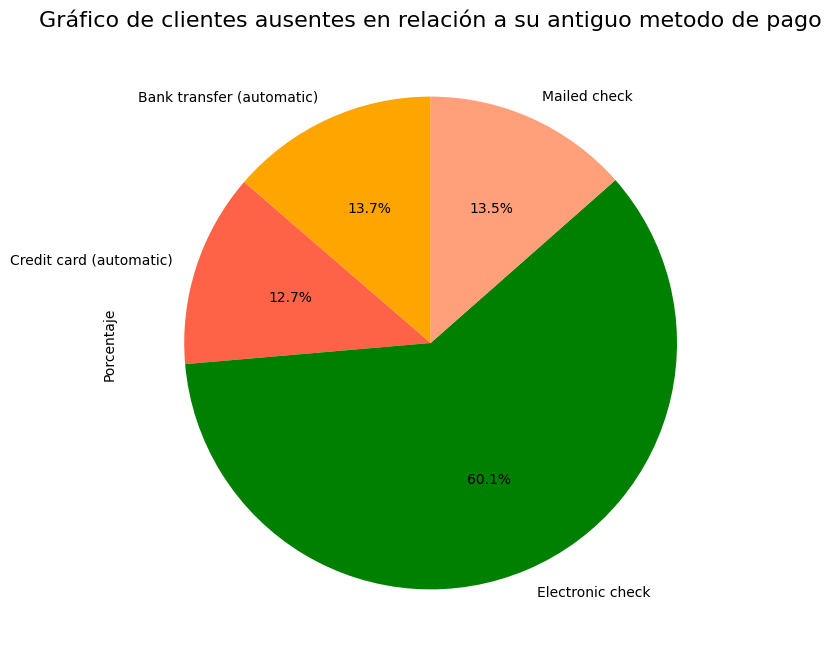

In [104]:
today = pd.to_datetime('today').normalize()
df["EndDate"] = pd.to_datetime(df["EndDate"]).dt.normalize()
clients_stay = df[df["EndDate"] ==  today]
clients_go = df[df["EndDate"] !=  today]

clients_go_by_payment = clients_go.groupby("PaymentMethod").agg({"customerID": "count"})
clients_go_by_payment = clients_go_by_payment.rename(columns={"customerID": "NumClientes"})
total_clientes_go = clients_go_by_payment["NumClientes"].sum()
clients_go_by_payment["Porcentaje"] = (clients_go_by_payment["NumClientes"]/ total_clientes_go) * 100
clients_go_by_payment["Porcentaje"] = clients_go_by_payment["Porcentaje"].round(2)
print(clients_go_by_payment["Porcentaje"])

ax = clients_go_by_payment["Porcentaje"].plot(kind = "pie", autopct= "%1.1f%%", figsize= (8,8), colors= ["orange", "tomato", "green", "lightsalmon"], legend= False, startangle = 90)
plt.title("Gráfico de clientes ausentes en relación a su antiguo metodo de pago", fontsize=16)
plt.show()




In [105]:
clients_go.info()
clients_stay.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1756 entries, 2 to 5515
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        1756 non-null   object        
 1   BeginDate         1756 non-null   datetime64[ns]
 2   EndDate           1756 non-null   datetime64[ns]
 3   Type              1756 non-null   object        
 4   PaperlessBilling  1756 non-null   object        
 5   PaymentMethod     1756 non-null   object        
 6   MonthlyCharges    1756 non-null   float64       
 7   TotalCharges      1756 non-null   float64       
 8   InternetService   1756 non-null   object        
 9   OnlineSecurity    1756 non-null   object        
 10  OnlineBackup      1756 non-null   object        
 11  DeviceProtection  1756 non-null   object        
 12  TechSupport       1756 non-null   object        
 13  StreamingTV       1756 non-null   object        
 14  StreamingMovies   1756 non-nu

                           NumClientes
PaymentMethod                         
Bank transfer (automatic)          972
Credit card (automatic)            968
Electronic check                  1187
Mailed check                       634
PaymentMethod
Bank transfer (automatic)    55.35
Credit card (automatic)      55.13
Electronic check             67.60
Mailed check                 36.10
Name: Porcentaje, dtype: float64


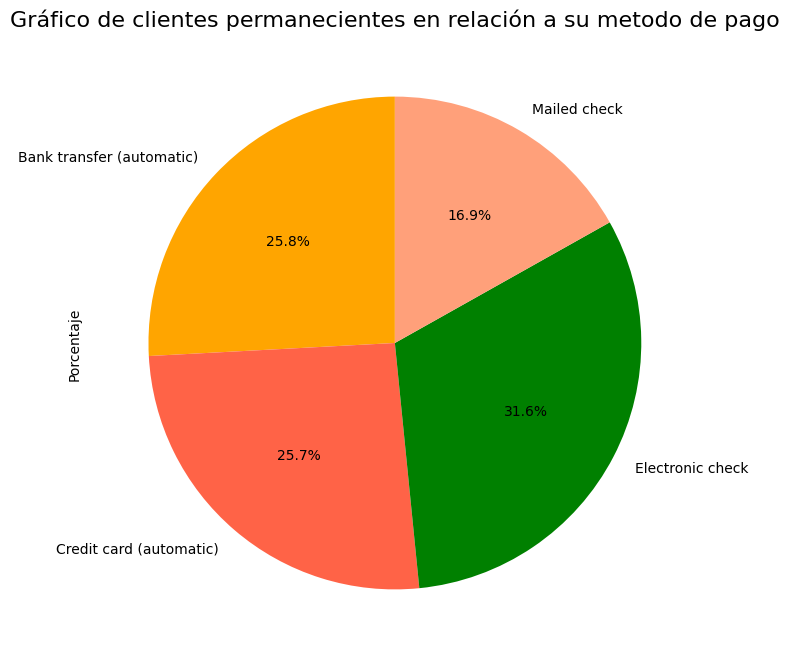

In [106]:
clients_stay_by_payment = clients_stay.groupby("PaymentMethod").agg({"customerID": "count"})
clients_stay_by_payment = clients_stay_by_payment.rename(columns={"customerID": "NumClientes"})
print(clients_stay_by_payment)

total_clientes_stay = clients_go_by_payment["NumClientes"].sum()
clients_stay_by_payment["Porcentaje"] = (clients_stay_by_payment["NumClientes"]/ total_clientes_stay) * 100
clients_stay_by_payment["Porcentaje"] = clients_stay_by_payment["Porcentaje"].round(2)
print(clients_stay_by_payment["Porcentaje"])

ax = clients_stay_by_payment["Porcentaje"].plot(kind = "pie", autopct= "%1.1f%%", figsize= (8,8), colors= ["orange", "tomato", "green", "lightsalmon"], legend= False, startangle = 90)
plt.title("Gráfico de clientes permanecientes en relación a su metodo de pago", fontsize=16)
plt.show()

In [107]:
dict_df_clients = [
    clients_stay, clients_go
]
month_names = [
    'Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 
    'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre'
]

for df in dict_df_clients:

    df['BeginDate'] = pd.to_datetime(df['BeginDate'], errors='coerce')
    df['EndDate'] = pd.to_datetime(df['EndDate'], errors='coerce')
    
    df['begin_year'] = df['BeginDate'].dt.year
    df['begin_month'] = df['BeginDate'].dt.month
    df['end_year'] = df['EndDate'].dt.year
    df['end_month'] = df['EndDate'].dt.month

    df['begin_month'] = df['begin_month'].apply(lambda x: month_names[x - 1])
    df['end_month'] = df['end_month'].apply(lambda x: month_names[x - 1])


In [108]:
# Verifica el resultado
print(clients_go[['begin_month', 'end_month']].head())


   begin_month  end_month
2      Octubre  Diciembre
4   Septiembre  Noviembre
5        Marzo  Noviembre
8        Julio  Noviembre
12  Septiembre    Octubre


In [109]:
clients_go["end_month"].value_counts()
time_before_say_bye = clients_go["EndDate"] - clients_go["BeginDate"]
time_before_say_bye.describe()


count                           1756
mean     566 days 10:23:14.077448744
std      598 days 19:45:30.623100768
min                 30 days 00:00:00
25%                 83 days 12:00:00
50%                306 days 00:00:00
75%                914 days 00:00:00
max               2191 days 00:00:00
dtype: object

In [110]:
grupo_1 = (time_before_say_bye >= pd.Timedelta("30 days")) & (time_before_say_bye <= pd.Timedelta("83 days"))
grupo_2 = (time_before_say_bye >= pd.Timedelta("84 days")) & (time_before_say_bye <= pd.Timedelta("306 days"))
grupo_3 = (time_before_say_bye >= pd.Timedelta("307 days")) & (time_before_say_bye <= pd.Timedelta("914 days"))
grupo_4 = time_before_say_bye > pd.Timedelta("914 days")

In [111]:
print("Grupo '30 a 83 dias': ", grupo_1.sum())  # Suma los `True`, es equivalente a contar los clientes
print("Grupo '84 a 306 dias'", grupo_2.sum())
print("Grupo '307 a 914 dias'", grupo_3.sum())
print("Grupo 'mas de 914 dias' ", grupo_4.sum())

Grupo '30 a 83 dias':  439
Grupo '84 a 306 dias' 443
Grupo '307 a 914 dias' 439
Grupo 'mas de 914 dias'  435


In [ ]:
#is_senior = df[(df['SeniorCitizen'] == 1) & (df['EndDate'] != today)]
#is_senior

<bound method DataFrame.value_counts of       customerID  BeginDate    EndDate            Type PaperlessBilling  \
18    8779-QRDMV 2019-11-01 2019-12-01  Month-to-month              Yes   
47    7495-OOKFY 2019-03-01 2019-11-01  Month-to-month              Yes   
49    1658-BYGOY 2018-07-01 2020-01-01  Month-to-month              Yes   
83    4598-XLKNJ 2017-12-01 2020-01-01  Month-to-month              Yes   
94    4846-WHAFZ 2016-10-01 2019-11-01  Month-to-month              Yes   
...          ...        ...        ...             ...              ...   
5475  6583-QGCSI 2015-11-01 2020-01-01  Month-to-month              Yes   
5487  1980-KXVPM 2019-09-01 2019-12-01  Month-to-month              Yes   
5489  0723-DRCLG 2019-11-01 2019-12-01  Month-to-month              Yes   
5507  6894-LFHLY 2019-10-01 2019-11-01  Month-to-month              Yes   
5515  8361-LTMKD 2019-07-01 2019-11-01  Month-to-month              Yes   

                PaymentMethod  MonthlyCharges  TotalCharges

In [ ]:
is_not_senior = df[df['SeniorCitizen'] == 0 ]
is_not_senior['SeniorCitizen'].value_counts()

<bound method IndexOpsMixin.value_counts of 2       3668-QPYBK
4       9237-HQITU
5       9305-CDSKC
8       7892-POOKP
12      0280-XJGEX
           ...    
5497    1699-HPSBG
5502    8775-CEBBJ
5507    6894-LFHLY
5509    0639-TSIQW
5515    8361-LTMKD
Name: customerID, Length: 1756, dtype: object>

## Plan de acción : visualización de datos.

- Crearemos distintos tipos de gráficas de visualización de acuerdo a los insights que encontremos, en los que esta planeado buscar por edades de las personas, tipo de servicio y tipo de adquisición de un plan. 
- Agrupar clientes por tipo de servicio, duración del contrato, método de pago, etc., y ver cómo se relacionan con la fuga.
- Crear gráficos descriptivos (barras, cajas, heatmaps) para visualizar diferencias y patrones.
- La manera en al que visualizaremos datos en esta ocasión será la libreria matplotlib. 

## Plan de acción : preparación del modelado. 

- Durante esta etapa del proyecto, se estableceran los parametros que se necesiten para preparar el entrenamiento de nuestro modelo.
- Se iniciará con la conversión de variables categóricas a variables numéricas(one-hot-encoding o label encoding).
- Escalar datos (si es necesario).
- Dividir el dataset en conjuntos de entrenamiento y prueba. 

## Plan de acción : Modelado predictivo.

1.  Aplicar modelos de clasificación como:
    - **Regresión logística** (como modelo base).
    - **Random forest** y/o **XGBoost** para mejorar precisión.
2. Se evaluarán los modelos usando diferentes métricas como precisión, recall, F1-Score. 
    

## Plan de acción : Conclusiones y recomendaciones. 

1. Se identificarán las variables que más influyen en la fuga de clientes.
2. Se presentarán ideas accionables para reducir la tasa de churn. 
3. Se formularán hipótesis que puedan usarse en futuras etapas de modelado predictivo o toma de decisiones.